In [111]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features
import random

In [112]:
values = read_csv("H:/shampoo.csv")

In [113]:
values 

,Month,Sales
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3
5,2001-06,168.5
6,2001-07,231.8
7,2001-08,224.5
8,2001-09,192.8
9,2001-10,122.9


In [114]:
values = values.rename(columns={values.columns[1]: 'Data'})

In [115]:
values = values.rename(columns={values.columns[0]: 'Time'})

In [116]:
random_indices = np.random.choice(values.index, 5, replace=False)
values.loc[random_indices, 'Data'] = np.nan

In [117]:
values

,Time,Data
0,2001-01,NaN
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,NaN
4,2001-05,180.3
5,2001-06,168.5
6,2001-07,231.8
7,2001-08,224.5
8,2001-09,192.8
9,2001-10,122.9


In [118]:
values['Time'] = pd.to_datetime(values['Time'], errors = 'coerce')
# values.set_index('Month', inplace=True)

In [119]:
values

,Time,Data
0,2001-01-01,NaN
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,NaN
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [120]:
missing_values_count = values.isna().sum().sum()
print(missing_values_count)

5


In [121]:
values['ID'] = 'Duy'

In [122]:
# Trích xuất các đặc trưng của chuỗi thời gian
# default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())

In [123]:
features = extract_features(values,column_id='ID',column_sort='Time')

ValueError: Column must not contain NaN values: Data

In [ ]:
list(features.columns)

['Data__variance_larger_than_standard_deviation',
 'Data__has_duplicate_max',
 'Data__has_duplicate_min',
 'Data__has_duplicate',
 'Data__sum_values',
 'Data__abs_energy',
 'Data__mean_abs_change',
 'Data__mean_change',
 'Data__mean_second_derivative_central',
 'Data__median',
 'Data__mean',
 'Data__length',
 'Data__standard_deviation',
 'Data__variation_coefficient',
 'Data__variance',
 'Data__skewness',
 'Data__kurtosis',
 'Data__root_mean_square',
 'Data__absolute_sum_of_changes',
 'Data__longest_strike_below_mean',
 'Data__longest_strike_above_mean',
 'Data__count_above_mean',
 'Data__count_below_mean',
 'Data__last_location_of_maximum',
 'Data__first_location_of_maximum',
 'Data__last_location_of_minimum',
 'Data__first_location_of_minimum',
 'Data__percentage_of_reoccurring_values_to_all_values',
 'Data__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'Data__sum_of_reoccurring_values',
 'Data__sum_of_reoccurring_data_points',
 'Data__ratio_value_number_to_time_series_le

In [ ]:
from tsfresh.feature_extraction import feature_calculators as fc

In [ ]:
print(values.mean())

Data    312.6
dtype: float64


C:\Users\haman\AppData\Local\Temp\ipykernel_764\4272790207.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(values.mean())
C:\Users\haman\AppData\Local\Temp\ipykernel_764\4272790207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(values.mean())


In [ ]:
features.Data__skewness[0]

0.8945388528534595

In [ ]:
features.head()

,Data__variance_larger_than_standard_deviation,Data__has_duplicate_max,Data__has_duplicate_min,Data__has_duplicate,Data__sum_values,Data__abs_energy,Data__mean_abs_change,Data__mean_change,Data__mean_second_derivative_central,Data__median,...,Data__fourier_entropy__bins_5,Data__fourier_entropy__bins_10,Data__fourier_entropy__bins_100,Data__permutation_entropy__dimension_3__tau_1,Data__permutation_entropy__dimension_4__tau_1,Data__permutation_entropy__dimension_5__tau_1,Data__permutation_entropy__dimension_6__tau_1,Data__permutation_entropy__dimension_7__tau_1,Data__query_similarity_count__query_None__threshold_0.0,Data__mean_n_absolute_max__number_of_maxima_7
Duy,1.0,0.0,0.0,0.0,11253.6,4294255.12,88.22,10.882857,2.730882,280.15,...,0.206192,0.63304,2.128549,1.693269,2.661067,3.059489,3.255111,3.354988,NaN,548.671429


In [ ]:
features.Data__maximum

Duy    682.0
Name: Data__maximum, dtype: float64

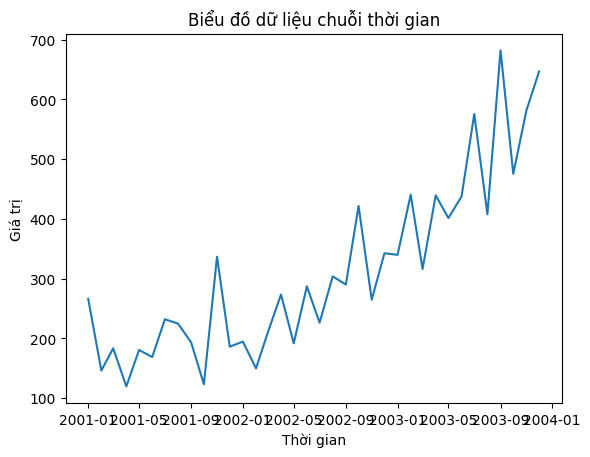

In [ ]:
plt.plot(values['Time'],values['Data'])
plt.title('Biểu đồ dữ liệu chuỗi thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

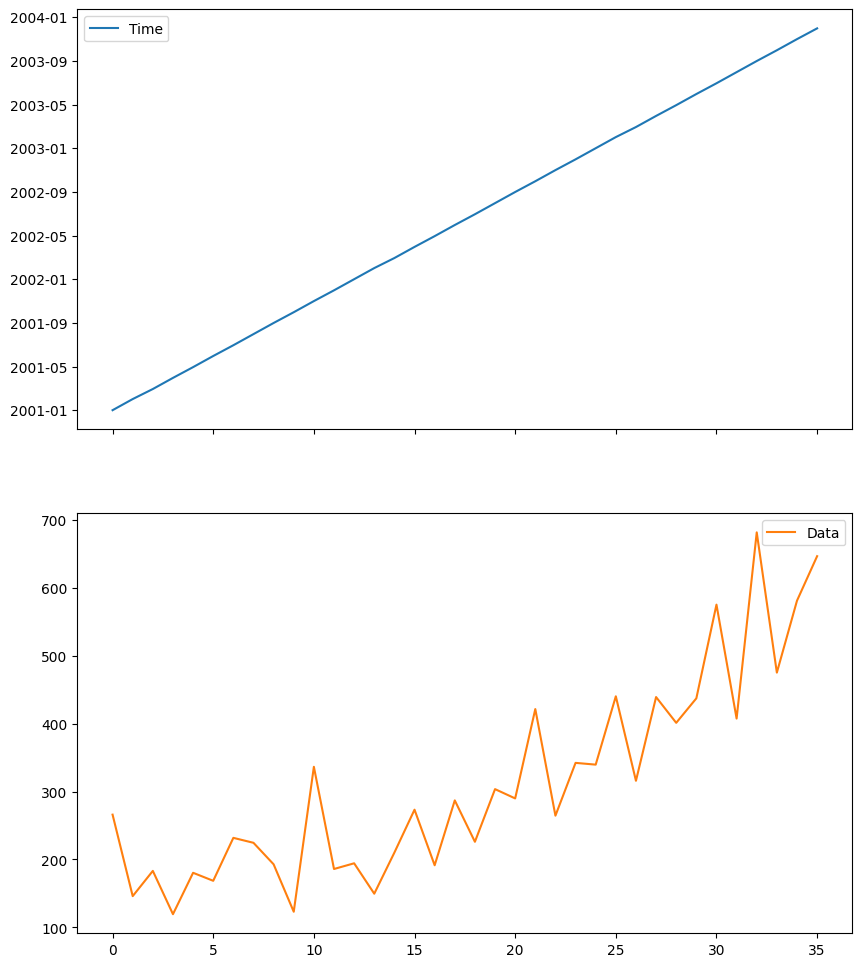

In [ ]:
values.plot(subplots=True, figsize=(10, 12))

In [ ]:
features.Data__sum_values[0]

11253.599999999999

In [ ]:
df.fillna(0, inplace=True)
df.fillna(method='ffill', inplace=True)  # Điền giá trị trước
df.fillna(method='bfill', inplace=True)  # Điền giá trị sau
mean_value = df['column_name'].mean()
df['column_name'].fillna(mean_value, inplace=True)

median_value = df['column_name'].median()
df['column_name'].fillna(median_value, inplace=True)

std_value = df['column_name'].std()

df['column_name'].fillna(std_value, inplace=True)
df['column_name'].fillna('Unknown', inplace=True, mask=df['column_name'].notnull())


NameError: name 'df' is not defined